<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Scikit_learn_model_building_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn model building example

Sklearn has an extensive user guide, to be found at: https://scikit-learn.org/stable/

Below we go through an example pipeline, where some fundamental applications of sklearn are demonstrated for building a machine learning model.

Needless to say, there is much, much more to sklearn than shown below. Please do visit https://scikit-learn.org/stable/ to get a glimpse of all the possibilities of this important package.

In [46]:
#import relevant modules
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Loading the Data

In [2]:
#load the Sonar data, containing 60 attributes, with the aim to classify 
# objects as Mine or Rock
# more information to be found at: https://datahub.io/machine-learning/sonar
df = pd.read_csv('https://datahub.io/machine-learning/sonar/r/sonar.csv')
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

As we have no categorical features in our data (only the outcome variable Class is categorical, we add two categorical features to our data, such that we can demonstrate the functionalities relating to this data type.

In [4]:
# add two fictive categorical features
df['batch'] = ['first']*60+['second']*60 + ['third']* (len(df)-60-60)
df['location'] = ['loc_A']*20+['loc_B']*30 +['loc_C']*40 +['loc_D']*50 + ['loc_E']* (len(df)-20-30-40-50)
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class,batch,location
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock,first,loc_A
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock,first,loc_A
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock,first,loc_A
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock,first,loc_A
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock,first,loc_A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

As this dataset does not have any missings, we will introduce some random missings such that we are forced to make use of more sklearn preprocessing functionalities

In [6]:
np.random.seed(42)
mask = np.random.choice([True, False], p=[0.1, 0.9], size=df.shape)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
# replace original df:
df = df.mask(mask)
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class,batch,location
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,NaN,0.1601,0.3109,0.2111,NaN,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,NaN,0.1307,0.2604,NaN,0.7547,0.8537,0.8507,0.6692,NaN,0.4943,0.2744,0.0510,0.2834,NaN,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,NaN,0.0084,NaN,0.0032,Rock,first,loc_A
1,0.0453,0.0523,0.0843,0.0689,0.1183,NaN,0.2156,0.3481,0.3337,NaN,0.4918,0.6552,0.6919,0.7797,NaN,0.9444,1.0000,0.8874,0.8024,0.7818,NaN,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,NaN,0.3835,NaN,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,NaN,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock,first,loc_A
2,0.0262,0.0582,NaN,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,NaN,0.7974,0.6737,NaN,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,NaN,0.4719,0.4647,0.2587,NaN,0.2222,0.2111,NaN,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock,first,loc_A
3,0.0100,NaN,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,NaN,0.2261,0.1729,0.2131,NaN,0.2281,0.4060,NaN,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,NaN,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,NaN,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,NaN,0.0050,0.0044,0.0040,0.0117,Rock,first,loc_A
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,NaN,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,NaN,0.2881,NaN,0.1951,0.4181,0.4604,0.3217,NaN,NaN,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,NaN,NaN,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,NaN,NaN,first,loc_A


The next step is to split the data into a random train (70%) and test (30%) set, such that we can perform model selection in the next section on the train set, and finally perform model assessment on the test set.

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Class']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

ValueError: ignored

This is not working due to missings in the outcome variable, which causes StratifiedShuffleSplit to fail, because we ask it to perform a split where the distribution of our outcome variable Class is comparable across both the train and test set. And when the outcome variable Class contains missings, that procedure fails.

This puts us in a Catch 22, as we cannot impute the outcome variable using only the training data on outcomes, as our training data has to be defined based on our outcome variable. Please note this will not be a problem when the split between train and test data is not done randomly, but based on time, or location. In our case, however, it is a problem, and this is typically the point where you check whether the missing outcome data can be retrieved through other means, where you decide to drop missings, or decide to impute the outcome data. 

We will impute the missing outcome values with the most occurring value, and use the preprocessing functionality of sklearn for this task. We will use this functionality again after splitting the data to impute missings in the predictors, as this will ensure that we do the exact same preprocessing on the predictors in the test set.

In [9]:
from sklearn.impute import SimpleImputer
imp_outcome = SimpleImputer(strategy = 'most_frequent')
imp_outcome.fit(df['Class'].to_frame())

SimpleImputer(strategy='most_frequent')

The code above created an 'impute object' that has been fitted on df['Class'] to determine what the imputation value should be. The imputation value is shown below (and equals 'Mine', which is indeed the most_frequent value in df['Class']

In [10]:
imp_outcome.statistics_

array(['Mine'], dtype=object)

df['Class'] now still contains missings, which will be imputed after we use 'transform' on df['Class']

In [11]:
sum(df['Class'].isnull())

15

In [12]:
df['Class'] = imp_outcome.transform(df['Class'].to_frame())
sum(df['Class'].isnull())

0

We could have done both the fitting and transforming in one go using the command imp_outcome.fit_transform().

We are now ready to proceed with splitting the data into a train and test set

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Class']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [14]:
#check if this resulted in a 70% train set and 30% test set with equal outcome distributions
print('share of observations in the train set:', str(round(len(strat_train_set)/len(df), 3)))
print('share of observations in the test set:', str(round(len(strat_test_set)/len(df), 3)))
print('share of mines in the train set:', str(round(len(strat_train_set.loc[strat_train_set['Class'] == 'Mine'])/len(strat_train_set), 3)))
print('share of mines in the test set:', str(round(len(strat_test_set.loc[strat_test_set['Class'] == 'Mine'])/len(strat_test_set), 3)))


share of observations in the train set: 0.697
share of observations in the test set: 0.303
share of mines in the train set: 0.559
share of mines in the test set: 0.556


In [15]:
# split features and outcome data
X_train = strat_train_set.loc[:,strat_train_set.columns != 'Class']
y_train = strat_train_set['Class']
X_test = strat_test_set.loc[:,strat_test_set.columns != 'Class']
y_test = strat_test_set['Class']

## Setting up the pipeline

Machine learning is about trial and error, with typically many iterations between different ways to prepare the data (data preparation) and assessing how that translates into performance (model building).

Going through different iterations should require the least possible effort, which is done by setting up a pipeline, using sklearn's pipeline functionality. A pipeline explicitly operationalizes all the different steps taken to get from raw data into data prepared and ready to serve as modeling input.


As such, the pipeline serves two purposes: 
- it encompasses every preprocessing step, coded within an overarching Python object, such that it is easily transferred to new data (the raw test data or tomorrow's raw process data). This approach prevents 'manual' adjustments to the data, that would get lost or need to be repeated 'manually' when preparing new data. 
- it makes it really easy to tweak the preprocessing steps, trying out different ways to prepare the data, requiring minimal adjustment to your code (less time-consuming and less error-prone)

Typically, the preprocessing steps include:
- selecting the variables
- imputing missing values
- scaling numeric variables
- creating dummy variables for categorical variables

The first thing to realize is that numeric and categorical features require different preprocessing steps, effectively meaning that our overarching pipeline should contain two parallel pipelines: one for preparing numeric features and one for preparing categorical features

In [16]:
# dividing the features into numeric and non-numeric
num_features = X_train.select_dtypes(include=['float']).columns
cat_features = X_train.select_dtypes(exclude=['float']).columns
print(num_features)
print(cat_features)

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

We will now define a 'numeric pipeline' and a 'categorical pipeline', which is then combined into a 'full pipeline'.

We start off with the 'numeric pipeline', containing the steps of imputing missing values, and standardizing the feature values (which is required for specific machine learning algorithms, and speeds up estimation of other models). As the imputation strategy within this pipeline only applies to numeric features, imputation can be straightforwardly applied using median imputation (or comparable methods).

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Let's unpack this part of our pipeline:
num_pipeline is now a Pipeline object, which, as you would expect, simply passes on the input it receives through each of the elements of the pipeline. Each element is given a user-defined name, and is accompanied by a specific preprocessing step, which is often a function imported from the sklearn.preprocessing module, but could also be a user-defined function. Each element in the Pipeline can be accessed separately, as shown below:

In [18]:
type(num_pipeline)

sklearn.pipeline.Pipeline

In [19]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

Each functionality can be accessed individually as follows:




In [20]:
num_pipeline['imputer']

SimpleImputer(strategy='median')

Just as we saw above, this preprocessing functionality can be used to transform data, but it needs to be fitted on data first (or it can be done simultaneously). Once we fit the num_pipeline to our numerical training data, it will contain medians to be imputed and scaling factors to be applied, making it possible to use the pipeline for transforming data according to these preprocessing steps.

In [21]:
# transforming will give an error, until the pipeline is being fitted (as stated in the NotFittedError below)
num_pipeline.transform(X_train[num_features])

NotFittedError: ignored

In [22]:
# transforming will give an error, until the pipeline is being fitted (as stated in the NotFittedError below)
num_pipeline.fit(X_train[num_features])

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

Now the imputer and standard scaler do contain fitted statistics that can be applied to transform data according to these preprocessing steps.

In [23]:
# the statistics_ for the imputer step contains the medians to be used for imputation
num_pipeline['imputer'].statistics_

array([0.0228 , 0.02925, 0.038  , 0.0454 , 0.06105, 0.0932 , 0.1122 ,
       0.113  , 0.1553 , 0.18705, 0.2373 , 0.2551 , 0.27065, 0.2976 ,
       0.3039 , 0.3047 , 0.3068 , 0.3771 , 0.4433 , 0.5425 , 0.6496 ,
       0.6628 , 0.7052 , 0.69325, 0.72775, 0.7545 , 0.7654 , 0.7321 ,
       0.634  , 0.6005 , 0.492  , 0.4241 , 0.3897 , 0.3682 , 0.3369 ,
       0.31035, 0.2821 , 0.315  , 0.28905, 0.2883 , 0.2609 , 0.2633 ,
       0.2207 , 0.1755 , 0.14955, 0.12785, 0.0947 , 0.08055, 0.049  ,
       0.0179 , 0.014  , 0.0115 , 0.00865, 0.0093 , 0.0075 , 0.0065 ,
       0.0057 , 0.0058 , 0.0069 , 0.0048 ])

In [24]:
# the statistics of the standardscaler are the mean and std
means = num_pipeline['std_scaler'].mean_
scale = num_pipeline['std_scaler'].scale_
pd.DataFrame({'Means':means, 'Scale':scale}, index=X_train[num_features].columns)

,Means,Scale
attribute_1,0.030316,0.024040
attribute_2,0.038669,0.035053
attribute_3,0.047230,0.041599
attribute_4,0.057621,0.050468
attribute_5,0.074851,0.055196
attribute_6,0.101849,0.048008
attribute_7,0.126627,0.063411
attribute_8,0.136208,0.085086
attribute_9,0.183074,0.117458
attribute_10,0.215243,0.135830


Now that the imputer and standard scaler have been fitted, we can use it to transform the numerical train data, and check whether it indeed results in fully imputed, fully scaled data:

In [25]:
X_num_prep = num_pipeline.transform(X_train[num_features])
X_num_prep

array([[ 0.92694488,  0.50297168,  1.79499411, ...,  0.34962688,
         4.36066979,  3.60663451],
       [-0.13792866, -0.63815596, -0.31562267, ...,  0.21471763,
         0.33508158,  0.82479305],
       [-0.18784461,  0.1321052 ,  0.17957899, ..., -0.24996978,
        -0.55085868, -0.21537375],
       ...,
       [-0.30847482, -0.05047522, -1.03919403, ..., -0.75962693,
         0.31953877, -0.2637536 ],
       [-0.74939902, -1.04040346, -0.66418695, ..., -0.32491936,
        -0.56640149,  0.29261469],
       [-0.88666787, -0.92629069, -0.2218709 , ..., -0.39986894,
         1.64067776, -0.2637536 ]])

You see that the pipeline has the typically undesired feature (though it does speed up computing time) of removing the column names. It is good practice to keep track of the column names, which becomes even more important when we apply preprocessing steps that will change the number of features that we have, as we will encounter when preprocessing the categorical features.

In [26]:
X_num_prep = pd.DataFrame(X_num_prep, columns=X_train[num_features].columns)
X_num_prep.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.926945,0.502972,1.794994,1.247895,-0.910411,0.007312,-0.227513,-1.084874,0.391854,-0.383149,0.043578,0.183576,0.138311,0.157250,-0.202950,-0.641501,-0.481701,-0.318653,-1.526312,-0.863553,-0.216869,0.054494,0.002387,0.065376,-0.126698,-0.756537,-0.158699,0.149119,0.614025,1.212968,1.848547,2.343166,1.313158,0.959491,1.692826,0.407710,-0.777738,0.137859,-0.176039,-0.614025,1.852024,1.729214,0.108635,2.432785,2.960505,2.777579,2.546510,0.879237,-0.008440,0.525834,1.887135,2.171228,0.802669,3.127028,4.007493,1.603111,0.983535,0.349627,4.360670,3.606635
1,-0.137929,-0.638156,-0.315623,-0.652323,0.133136,0.494733,0.089465,0.260823,0.158578,-0.022404,-0.223472,-0.124327,-0.102535,0.593721,0.861665,0.806368,0.914055,0.875360,0.570761,0.496420,0.692751,0.846574,1.014841,1.338627,1.386574,1.012920,0.184880,0.513488,0.226568,-0.116971,-0.373671,-0.496511,-0.117814,-1.429086,-0.140637,-0.863126,-0.369389,-0.473242,-0.660572,-0.153555,-0.322060,-0.580755,-0.267850,-0.260288,-0.518082,-0.657188,-0.268295,0.036939,0.135541,0.991127,0.331137,-0.196059,1.686764,-0.344468,-0.733223,0.209051,1.088333,0.214718,0.335082,0.824793
2,-0.187845,0.132105,0.179579,0.207629,-0.250042,0.482235,0.046886,0.431239,0.820094,0.590127,0.013195,0.028115,-0.464397,-0.619668,-1.104609,-1.131452,-0.902350,-0.943020,-1.332970,-1.934171,-2.213663,-1.536829,-0.722171,-0.178734,0.308597,0.818689,1.196162,1.374217,1.305235,1.771073,1.881736,-0.052519,1.394695,1.093945,-0.140637,1.132673,1.058557,0.523519,-0.176039,0.602042,-0.197005,0.739405,1.331459,1.900056,-0.257707,1.072056,1.057134,0.971437,0.927435,0.487060,-0.315070,-0.449697,-0.595808,-1.260943,-0.277659,-0.249970,-0.780564,-0.249970,-0.550859,-0.215374
3,-0.778517,-0.592511,-0.056002,1.029934,2.109716,-0.196821,-0.796811,-0.317415,-0.914150,-0.844020,0.008398,1.074835,0.769494,1.025204,1.411707,1.233505,1.445897,1.821751,1.864392,1.640181,1.030471,0.829061,0.724431,0.065376,-0.315311,-1.010462,-1.273895,-1.251656,-0.821466,-0.987414,-1.002292,-0.646149,-0.474538,-0.755014,-0.689435,-0.245891,-0.124805,0.471531,0.230799,-0.253116,-0.735993,-0.655130,-0.175987,-0.810827,-0.895678,-1.030395,-1.088029,-0.728787,-1.237815,-1.125955,-1.080315,0.311217,-0.001053,-0.358354,2.498437,3.354188,0.372213,-0.384879,-0.224460,0.800603
4,-0.587172,-0.381402,-0.505530,-0.376901,-0.187537,-1.138334,-0.331595,0.030468,-0.236458,-0.602542,0.383387,1.652909,-0.102535,1.609451,-0.195239,-0.299612,1.813400,2.133541,1.808929,1.398247,0.641789,0.153604,0.040522,-0.356427,-1.359233,-2.762099,-2.986928,-2.846234,-2.270763,-2.048062,-0.887367,0.130098,-0.096410,0.489356,0.508345,-0.245891,-0.499976,-0.145242,0.241974,-0.967230,-1.362519,-0.894370,-0.663159,-1.336588,-0.257707,-0.262237,-1.056856,-1.114775,-1.002462,-0.970857,-0.179026,-0.661062,-0.274319,1.696771,1.473417,-0.096963,-0.326440,0.304657,-0.550859,-0.965261


In [27]:
# every missing has been imputed
sum(X_num_prep.isnull().sum())

0

In [28]:
# every mean is 0; every standard deviation is 1
mean = X_num_prep.mean(axis=0).round(3)
std = X_num_prep.std(axis=0).round(3)
pd.DataFrame({'Prepped_Means':mean, 'Prepped_Scale':std}, index=X_train[num_features].columns)

,Prepped_Means,Prepped_Scale
attribute_1,0.0,1.003
attribute_2,-0.0,1.003
attribute_3,0.0,1.003
attribute_4,0.0,1.003
attribute_5,0.0,1.003
attribute_6,-0.0,1.003
attribute_7,-0.0,1.003
attribute_8,-0.0,1.003
attribute_9,-0.0,1.003
attribute_10,-0.0,1.003


### Categorical preprocessing

We took very small steps when walking through the numeric preprocessing pipeline. Now that we have seen the general principles, we will go through the categorical preprocessing pipeline more quickly

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False))])

In [30]:
cat_pipeline.fit(X_train[cat_features])

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder', OneHotEncoder(sparse=False))])

In [31]:
cat_pipeline['cat_imputer'].statistics_

array(['third', 'loc_E'], dtype=object)

In [32]:
X_cat_prep = cat_pipeline.transform(X_train[cat_features])

As the code below shows, our prepared data now contains 8 columns, while we started with 2 categorical features. This is due to the OneHotEncoder transforming the two categorical features (containing 3, and 5 levels) into 1 feature per level.

In [33]:
X_cat_prep.shape

(145, 8)

Feature names of these 8 variables are easily accessed through:

In [34]:
cat_pipeline['cat_encoder'].get_feature_names(cat_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['batch_first', 'batch_second', 'batch_third', 'location_loc_A',
       'location_loc_B', 'location_loc_C', 'location_loc_D',
       'location_loc_E'], dtype=object)

Such that we could add those to the numpy array, to better keep track of what is happening to the data while preprocessing

In [35]:
cat_names = cat_pipeline['cat_encoder'].get_feature_names(cat_features)
pd.DataFrame(X_cat_prep, columns = cat_names).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,batch_first,batch_second,batch_third,location_loc_A,location_loc_B,location_loc_C,location_loc_D,location_loc_E
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Full Pipeline

Now that we have constructed the numeric and categorical pipeline, we can define the full pipeline, simply as being a combination of both pipelines, wrapped in a ColumnTransformer, which allows for different subsets of features to be transformed differently.

In [36]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)])

By applying the fit_transform functionality, this could be applied straight away to the raw data and end up with our fully prepared data.

In [37]:
X_train_prep = full_pipeline.fit_transform(X_train)
pd.DataFrame(X_train_prep, columns=[num_features.tolist() + cat_names.tolist()]).head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,batch_first,batch_second,batch_third,location_loc_A,location_loc_B,location_loc_C,location_loc_D,location_loc_E
0,0.926945,0.502972,1.794994,1.247895,-0.910411,0.007312,-0.227513,-1.084874,0.391854,-0.383149,0.043578,0.183576,0.138311,0.157250,-0.202950,-0.641501,-0.481701,-0.318653,-1.526312,-0.863553,-0.216869,0.054494,0.002387,0.065376,-0.126698,-0.756537,-0.158699,0.149119,0.614025,1.212968,1.848547,2.343166,1.313158,0.959491,1.692826,0.407710,-0.777738,0.137859,-0.176039,-0.614025,1.852024,1.729214,0.108635,2.432785,2.960505,2.777579,2.546510,0.879237,-0.008440,0.525834,1.887135,2.171228,0.802669,3.127028,4.007493,1.603111,0.983535,0.349627,4.360670,3.606635,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.137929,-0.638156,-0.315623,-0.652323,0.133136,0.494733,0.089465,0.260823,0.158578,-0.022404,-0.223472,-0.124327,-0.102535,0.593721,0.861665,0.806368,0.914055,0.875360,0.570761,0.496420,0.692751,0.846574,1.014841,1.338627,1.386574,1.012920,0.184880,0.513488,0.226568,-0.116971,-0.373671,-0.496511,-0.117814,-1.429086,-0.140637,-0.863126,-0.369389,-0.473242,-0.660572,-0.153555,-0.322060,-0.580755,-0.267850,-0.260288,-0.518082,-0.657188,-0.268295,0.036939,0.135541,0.991127,0.331137,-0.196059,1.686764,-0.344468,-0.733223,0.209051,1.088333,0.214718,0.335082,0.824793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.187845,0.132105,0.179579,0.207629,-0.250042,0.482235,0.046886,0.431239,0.820094,0.590127,0.013195,0.028115,-0.464397,-0.619668,-1.104609,-1.131452,-0.902350,-0.943020,-1.332970,-1.934171,-2.213663,-1.536829,-0.722171,-0.178734,0.308597,0.818689,1.196162,1.374217,1.305235,1.771073,1.881736,-0.052519,1.394695,1.093945,-0.140637,1.132673,1.058557,0.523519,-0.176039,0.602042,-0.197005,0.739405,1.331459,1.900056,-0.257707,1.072056,1.057134,0.971437,0.927435,0.487060,-0.315070,-0.449697,-0.595808,-1.260943,-0.277659,-0.249970,-0.780564,-0.249970,-0.550859,-0.215374,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.778517,-0.592511,-0.056002,1.029934,2.109716,-0.196821,-0.796811,-0.317415,-0.914150,-0.844020,0.008398,1.074835,0.769494,1.025204,1.411707,1.233505,1.445897,1.821751,1.864392,1.640181,1.030471,0.829061,0.724431,0.065376,-0.315311,-1.010462,-1.273895,-1.251656,-0.821466,-0.987414,-1.002292,-0.646149,-0.474538,-0.755014,-0.689435,-0.245891,-0.124805,0.471531,0.230799,-0.253116,-0.735993,-0.655130,-0.175987,-0.810827,-0.895678,-1.030395,-1.088029,-0.728787,-1.237815,-1.125955,-1.080315,0.311217,-0.001053,-0.358354,2.498437,3.354188,0.372213,-0.384879,-0.224460,0.800603,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.587172,-0.381402,-0.505530,-0.376901,-0.187537,-1.138334,-0.331595,0.030468,-0.236458,-0.602542,0.383387,1.652909,-0.102535,1.609451,-0.195239,-0.299612,1.813400,2.133541,1.808929,1.398247,0.641789,0.153604,0.040522,-0.356427,-1.359233,-2.762099,-2.986928,-2.846234,-2.270763,-2.048062,-0.887367,0.130098,-0.096410,0.489356,0.508345,-0.245891,-0.499976,-0.145242,0.241974,-0.967230,-1.362519,-0.894370,-0.663159,-1.336588,-0.257707,-0.262237,-1.056856,-1.114775,-1.002462,-0.970857,-0.179026,-0.661062,-0.274319,1.696771,1.473417,-0.096963,-0.326440,0.304657,-0.550859,-0.965261,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


And that's it! Now the training data is fully prepared and ready for the phase of model building. Below you find once more the full code needed to set up the pipeline, without all the detours taken above.


In [ ]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer

#num_pipeline = Pipeline([
#        ('imputer', SimpleImputer(strategy="median")),
#        ('std_scaler', StandardScaler()),
#    ])
#
#from sklearn.preprocessing import OneHotEncoder
#
#cat_pipeline = Pipeline([
#        ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
#        ('cat_encoder', OneHotEncoder(sparse=False))])
#
#from sklearn.compose import ColumnTransformer
#
#full_pipeline = ColumnTransformer([
#        ("num", num_pipeline, num_features),
#        ("cat", cat_pipeline, cat_features)])
#
#num_features = X_train.select_dtypes(include=['float']).columns
#cat_features = X_train.select_dtypes(exclude=['float']).columns
#X_train_prep = full_pipeline.fit_transform(X_train)


## Building models

We now build a gradient boosting model, as it will demonstrate how to tune hyperparameters. 

We start off training a gradient boosting classifier wiht default hyperparameter settings.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=42)
GB_clf.fit(X_train_prep, y_train)

GradientBoostingClassifier(random_state=42)

We can check the accuracy of this classifier

In [39]:
accuracy_score(GB_clf.predict(X_train_prep), y_train)

1.0

and see that the model gets a perfect accuracy on the training set, which is simply the result of using a highly flexible model, while not using cross-validation (meaning there is no guarding against overfitting and the model simply remembers all the training instances). An honest evaluation of model assessment can only be obtained by assessing the accuracy on the test set, for which we first need to prepare the test features, which is really simple now that we have set up the pipeline.

In [40]:
X_test_prep = full_pipeline.transform(X_test)
pd.DataFrame(X_test_prep, columns=[num_features.tolist() + cat_names.tolist()]).head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,batch_first,batch_second,batch_third,location_loc_A,location_loc_B,location_loc_C,location_loc_D,location_loc_E
0,-0.312634,-0.504073,-0.457452,0.039206,-0.519081,-0.498855,0.155699,-0.684103,-0.674914,-0.431003,-0.010791,-0.009618,0.047351,-0.095280,-0.118131,-0.817829,-0.926473,-0.926879,-1.027920,-0.966034,-0.807373,-0.968841,-0.691999,0.065376,0.303357,0.188777,0.704892,1.354697,1.259931,0.588292,0.550684,-0.052519,-0.105583,-0.199153,-0.666384,-0.972613,-0.809215,-0.865519,-0.460480,-0.390605,-0.304552,-0.076243,-0.940252,-0.732621,-0.289865,0.215736,-0.268295,0.868298,-0.105350,-0.179860,0.263115,0.173829,-0.627957,-0.386126,-0.049876,-0.249970,-0.343906,-0.354899,-0.550859,-0.844312,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.383349,-0.738005,-1.099291,-0.250087,-0.067964,1.134211,0.396981,-0.183433,-0.140253,-0.594443,-1.362831,-1.657806,-1.272754,-0.308527,0.442707,1.080059,1.223888,1.397371,1.541766,1.627722,1.239169,0.153604,0.546330,-0.717911,0.197917,-1.706751,-2.062757,0.149119,-0.232082,0.192363,-0.219116,-0.360655,0.155844,-0.045750,-0.262986,-0.623427,-1.013390,-0.978948,-0.903770,-1.271839,-0.800396,-0.580135,-0.843119,-0.253319,0.091189,-0.668258,-0.522297,-0.292792,-0.277020,-0.528829,0.135574,-0.174923,-1.222711,-0.872136,-0.647805,-0.827995,-0.902828,-0.609728,-0.504230,-1.062021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.845071,-0.318640,-0.678610,-0.406622,-0.602420,-1.702826,-1.501731,-0.835714,0.055562,0.379570,0.708804,0.542042,-0.319653,-1.147798,-1.100496,0.325839,-0.422146,0.972597,1.135553,1.546542,1.520266,0.776521,-0.317776,-0.169152,0.197917,-0.109696,-1.395054,-2.411687,-1.828941,-0.945368,-0.067039,-0.052519,-0.968855,-0.127866,-0.140637,-0.245891,0.867569,-0.049772,-0.265176,-0.512093,-0.550286,-0.528072,-1.203039,-0.925426,-0.337583,-0.262237,0.036508,-0.145897,0.110621,-0.179860,-0.153518,-0.481402,0.079319,-1.024881,-0.092586,-0.555983,0.721540,-0.894536,0.117482,-0.021854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.071374,0.189162,-0.469472,-0.796970,-0.660395,-0.059344,-0.102929,0.553468,0.233499,0.652706,0.398579,1.272558,2.773776,3.173264,3.383121,2.814629,2.005255,-0.318653,0.849642,-0.051347,0.160892,-0.898389,-0.275451,-1.703063,0.197917,-0.596609,-0.816674,-1.510525,-1.247755,-0.369745,0.259904,0.211808,-0.117814,-0.797426,-1.010380,-0.342670,0.132966,0.331162,0.443131,-0.153555,-0.135728,-0.127066,-1.287371,-0.669901,-0.467598,-0.412073,-0.642370,-0.691282,-0.789259,-0.939838,-0.459616,-0.935836,-1.367381,-0.997109,-0.277659,0.158048,-0.326440,-0.324919,-0.504230,-0.263754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.312634,0.037962,0.718051,0.461256,-0.412190,-0.180157,-1.768245,-0.808683,-0.456963,-0.207562,-1.237302,-1.335564,-2.043936,-1.195810,-1.220272,-0.746939,-0.992058,-0.744215,-0.497891,-0.614386,-1.062989,-1.929287,0.211499,-1.722662,-2.324566,-2.002552,-1.223928,0.241606,1.179247,1.004242,-0.143325,-0.917860,0.633854,1.043863,-0.140637,0.328331,1.218494,1.425756,-0.176039,-0.153555,-0.395217,-1.354256,-1.831769,-1.628505,-1.291947,-1.273137,-1.361658,-1.463258,-1.520239,-1.567983,-1.343899,-0.819586,2.217221,1.307964,-0.633568,0.974084,1.542457,0.019849,0.863537,1.260212,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Be careful not to use 'fit_transform' with the pipeline, but only 'transform', as we have to use the fitted information (scaling etc) from the training data. One way to remember this is to see the test data as something that does not come in batches, but in single instances: you want your model to work on new, single observations. A single observation cannot be scaled to mean 0 and standard deviation 1, which is why we apply the preprocessing parameters derived in the train set to prepare the test set.

In [41]:
accuracy_score(GB_clf.predict(X_test_prep), y_test)

0.8253968253968254

The accuracy of the default gradient boosting classifier is 0.825 on the test set. Please realize that this model is based on the default values for the range of hyperparameters available in this model.

In [42]:
GB_clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=42)>

The natural thing to do is to 'tune the hyperparameters', which means nothing more than trying out a lot of different values for these hyperparameters, and see which specific setting generates the best performance. This requires us to do two things: 
- defining the different hyperparameters to be tried out (a.k.a. defining a grid of hyperparameter values)
- defining the cross-validation strategy: remember that comparing the performance for all the possible different hyperparameter settings should be done within the train set (to prevent information leakage from the test into the train set)
After doing these two things, we can simply fit the model again and assess its accuracy on the test set.

In [43]:
# defining the grid (as a dictionary where the keys have the same names as 
# corresponding hyperparameter in the gradientBoostingClassifier object)
max_feat = np.linspace(1, len(X_train.columns), 4).astype(int)
max_depth = np.linspace(1, 3, 3).astype(int)
learning_rate = np.array([0.05, 0.1, 0.15])
n_estimators = np.linspace(50, 300, 6).astype(int)
grid = dict()
grid['max_features'] = max_feat
grid['max_depth'] = max_depth
grid['n_estimators'] = n_estimators
grid['learning_rate'] = learning_rate
grid

{'learning_rate': array([0.05, 0.1 , 0.15]),
 'max_depth': array([1, 2, 3]),
 'max_features': array([ 1, 21, 41, 62]),
 'n_estimators': array([ 50, 100, 150, 200, 250, 300])}

In [44]:
# defining the cross validation strategy
GB_clf_tune = GradientBoostingClassifier(random_state=42)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
gscv_gb_1 = GridSearchCV(GB_clf_tune, param_grid = grid, scoring='accuracy', cv = cv, n_jobs=-1)

In [45]:
# and now we simply train the model again, this time trying out the different
# hyperparameter values defined in 'grid', using the cross-validation strategy outline in 'cv'
# this naturally takes longer, as many more models are being trained (and compared)
gscv_gb_1.fit(X_train_prep, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15]),
                         'max_depth': array([1, 2, 3]),
                         'max_features': array([ 1, 21, 41, 62]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
             scoring='accuracy')

In [47]:
# having tried out all the different hyperparameter settings, we are obviously
# wondering what the best setting turned out to be
gscv_gb_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.15, max_features=41,
                           n_estimators=150, random_state=42)

The best performance occurred at the hyperparameter values shown above.

In [48]:
#best_score_ provides the mean cross-validated score of the best_estimator 
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
gscv_gb_1.best_score_

0.930952380952381

As some of the optimal hyperparameters are on the edge of our grid (learning rate and max_depth), we could try to further optimize performance by redefing our grid to be centered around the currently optimal parameter values. 

In [49]:
max_feat = np.linspace(1, len(X_train.columns), 4).astype(int)
max_depth = np.linspace(1, 4, 4).astype(int)
learning_rate = np.array([0.025, 0.05, 0.075])
n_estimators = np.linspace(150, 400, 6).astype(int)
grid2 = dict()
grid2['max_features'] = max_feat
grid2['max_depth'] = max_depth
grid2['n_estimators'] = n_estimators
grid2['learning_rate'] = learning_rate
grid2

{'learning_rate': array([0.025, 0.05 , 0.075]),
 'max_depth': array([1, 2, 3, 4]),
 'max_features': array([ 1, 21, 41, 62]),
 'n_estimators': array([150, 200, 250, 300, 350, 400])}

In [50]:
GB_clf_tune_2 = GradientBoostingClassifier(random_state=42)
gscv_gb_2 = GridSearchCV(GB_clf_tune_2, param_grid = grid2, scoring='accuracy', cv = cv, n_jobs=-1)

In [51]:
gscv_gb_2.fit(X_train_prep, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': array([0.025, 0.05 , 0.075]),
                         'max_depth': array([1, 2, 3, 4]),
                         'max_features': array([ 1, 21, 41, 62]),
                         'n_estimators': array([150, 200, 250, 300, 350, 400])},
             scoring='accuracy')

In [52]:
gscv_gb_2.best_estimator_

GradientBoostingClassifier(learning_rate=0.075, max_features=41,
                           n_estimators=350, random_state=42)

We see that the model actually chooses the same hyperparameter values. As they are currently in the center of our grid (grid2), we can stop searching for better parameter settings. To complete the process, we again view the mean cross-validated scores for the best estimator, but it will result in the same performance estimate (because we not only use the same hyperparameter settings, but due to setting the same random_state within the cross-validation strategy, our folds contain identical instances)

In [53]:
gscv_gb_2.best_score_

0.9328571428571428

## Assess results

We assess the accuracy on the test set simply by using the predict option on the prepared test features

In [54]:
accuracy_score(gscv_gb_2.predict(X_test_prep), y_test)

0.8571428571428571

Accuracy is higher than the performance we got for our non-tuned gradient boosting classifier (accuracy: 0.825), but notice that it is lower than the cross-validated performance on the train set. This indicates that the model is somewhat overfitting the train set, which is not too surprising given that we train a very flexible model on a very small dataset.

To gain more insight in the type of right and wrong predictions, we can plot the confusion matrix.

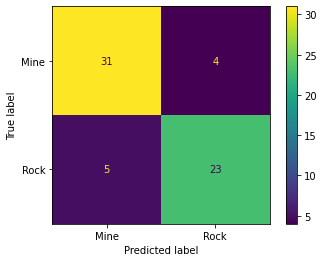

In [56]:
cm = confusion_matrix(y_test, gscv_gb_2.best_estimator_.predict(X_test_prep), labels=gscv_gb_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv_gb_2.classes_)
disp.plot()

# Conclusion

This notebook took a 'small step by small step' approach to developing a model. Sklearn has amazing abilities, but the risk in using such a powerful library is that you lose sight of what is happening and start leaning on the preprogrammed features too easily. 

Especially when you start working with sklearn and its wide array of applications, it really pays off to take this step by step approach to really keep track of what is happening as much as possible. 